In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

from linear import *
from loss import *

Epoch 0, Loss 11280.755155825314


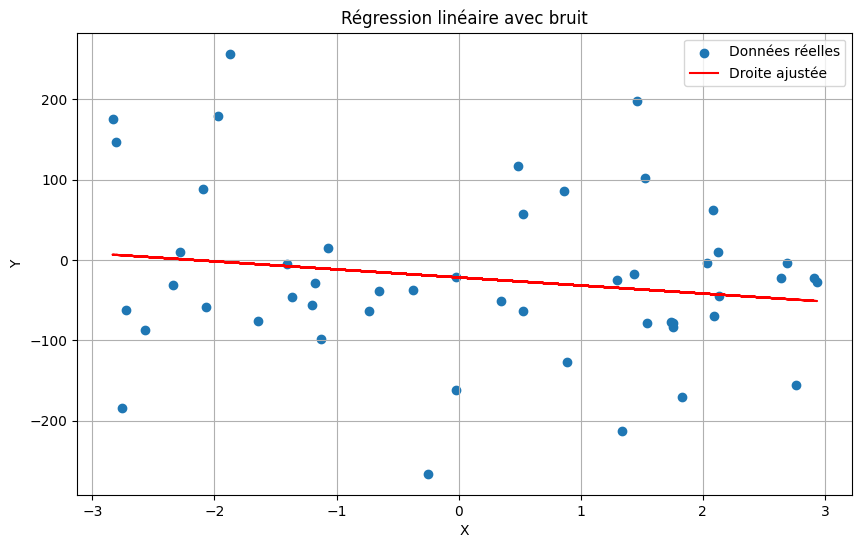

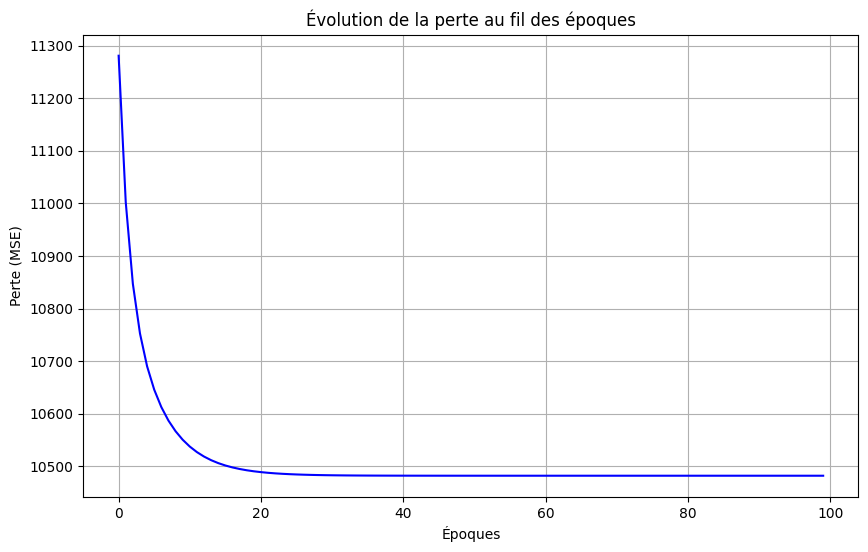

In [4]:
# --- Génération des données  ---

# Nombre d'échantillon
n_samples = 50

X = np.random.uniform(-3, 3, n_samples).reshape((-1, 1))

# Génération du bruit
noise = np.random.normal(0, 100, n_samples).reshape((-1, 1))

true_slope = -20
true_intercept = -10

y = true_slope * X + true_intercept + noise

# Création du modèle
model = Linear(X.shape[1], 1)

# Définition de la fonction de perte
loss_fn = MSELoss()

# --- Boucle d'apprentissage ---
gradient_step = 1e-3
num_epochs = 100
losses = []
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model.forward(X)
    
    # Calcul de la perte
    loss = loss_fn.forward(y, y_pred)
    losses.append(np.mean(loss))
    
    # Calcul du gradient
    grad_y_pred = loss_fn.backward(y, y_pred) 
    grad_weights = model.backward_delta(X, grad_y_pred)
    model.backward_update_gradient(X, grad_y_pred)
    
    # Update des poids
    model.update_parameters(gradient_step=gradient_step)
    model.zero_grad()
    
    if epoch % 10 == 0 :
        print(f'Epoch {epoch}, Loss {np.mean(loss)}') 
        



# --- Visualisation des résultats ---
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Données réelles')
plt.plot(X, model.forward(X), color='red', label='Droite ajustée')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Régression linéaire avec bruit')
plt.legend()
plt.grid(True)
plt.show()

# --- Tracé de la perte au fil des époques ---
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), losses, color='blue')
plt.xlabel('Époques')
plt.ylabel('Perte (MSE)')
plt.title('Évolution de la perte au fil des époques')
plt.grid(True)
plt.show()